## __California Housing Price Prediction__

#### __Workflow Stages__

1. Load the data :
    * Read the “housing.csv” file from the folder into the program.
    * Print first few rows of this data.
    * Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :
    * Fill the missing values with the mean of the respective column.
3. Encode categorical data :
    * Convert categorical column in the dataset to numerical data.
4. Split the dataset : 
    * Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :
    * Standardize training and test datasets.
6. Perform Linear Regression : 
    * Perform Linear Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print root mean squared error (RMSE) from Linear Regression.
7. Perform Decision Tree Regression :
    * Perform Decision Tree Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print root mean squared error from Decision Tree Regression.
8. Perform Random Forest Regression :
    * Perform Random Forest Regression on training data.
    * Predict output for test dataset using the fitted model.
    * Print RMSE (root mean squared error) from Random Forest Regression.
9. Bonus exercise: Perform Linear Regression with one independent variable :
    * Extract just the median_income column from the independent variables (from X_train and X_test).
    * Perform Linear Regression to predict housing values based on median_income.
    * Predict output for test dataset using the fitted model.
    * Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

#### __Problem definition__

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

__Import libraries__

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### __Load the dataset__

In [2]:
df = pd.read_excel('1553768847_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### __Handle missing values__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

There is some missing values in total_bedrooms column. We can fill it with the help of total_rooms column. But in this problem they said to fill them with the mean value of respective column.

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### __Encode categorical data__

Here I am using sklearn LabelEncoder to encord(convert) categorical data to numerical values.

In [7]:
encoder = LabelEncoder()

In [8]:
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


### __Split the dataset__

In [10]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

### __Standardize data__

Here I'm using standard scaler for standardize data.

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### __Perform Linear Regression__

In [15]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
linear_reg.score(X_test_scaled, y_test)

0.6216524048428148

In [17]:
y_pred = linear_reg.predict(X_test_scaled)

In [18]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))

71618.88812082914


### __Perform Decision Tree Regression__

In [19]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [20]:
dec_tree.score(X_test_scaled, y_test)

0.6519937447788383

In [21]:
y_pred = dec_tree.predict(X_test_scaled)

In [22]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))

68687.16798487518


### __Perform Random Forest Regression__

In [23]:
random_for = RandomForestRegressor()
random_for.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [24]:
random_for.score(X_test_scaled, y_test)

0.8270835432042274

In [25]:
y_pred = random_for.predict(X_test_scaled)

In [26]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))

48417.2645567507


### __Bonus exercise: Perform Linear Regression with one independent variable__

In [61]:
X_train_new = np.array(X_train['median_income']).reshape(-1, 1)
X_test_new = np.array(X_test['median_income']).reshape(-1, 1)

In [62]:
linear_reg.fit(X_train_new, y_train)

LinearRegression()

In [63]:
linear_reg.score(X_test_new,y_test)

0.4651765687863896

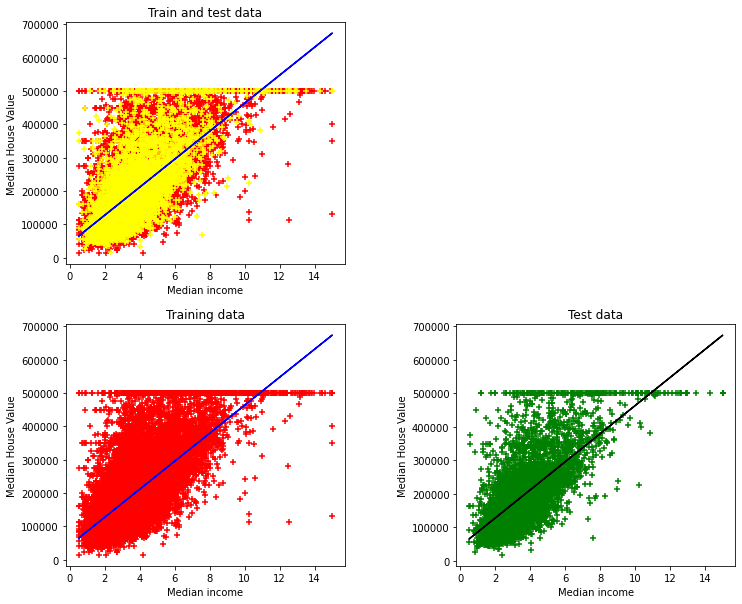

In [108]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=.25, wspace=.40)
plt.subplot(2,2,1)
plt.title('Train and test data')
plt.xlabel('Median income')
plt.ylabel('Median House Value')
plt.scatter(X_train_new, y_train, marker='+', color='red')
plt.scatter(X_test_new, y_test, marker='+', color='yellow')
plt.plot(X_test_new, linear_reg.predict(X_test_new), color='blue')
plt.subplot(2,2,3)
plt.title('Training data')
plt.xlabel('Median income')
plt.ylabel('Median House Value')
plt.scatter(X_train_new, y_train, marker='+', color='red')
plt.plot(X_test_new, linear_reg.predict(X_test_new), color='blue')
plt.subplot(2,2,4)
plt.title('Test data')
plt.xlabel('Median income')
plt.ylabel('Median House Value')
plt.scatter(X_test_new, y_test, marker='+', color='green')
plt.plot(X_test_new, linear_reg.predict(X_test_new), color='black')